# DGEMM on JURECADC (AMD ROME EPYC 7742)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
%matplotlib inline
sns.set(
    palette=sns.color_palette("Paired"),
    rc={
        "figure.figsize": (24, 10)
    },
    color_codes=False
)
from scipy.stats import linregress
SYSTEM="jurecadc"
DATADIR="../../data/"+SYSTEM+"/"
plt.rcParams['figure.figsize'] = [24, 10]  # Bug; needed to be set twice

In [2]:
plt.rcParams['figure.figsize'] = [24, 10]  # Bug; needed to be set twice

In [3]:
frequency = 2.25
turbofrequency = 3.4
sockets = 2
corespersocket = 64
flopspercycle = 16

singlecorepeak = 1 * turbofrequency * flopspercycle
theoreticalpeak= sockets * corespersocket * frequency * flopspercycle

def theoricalPeak(core):
    # Turbo Bost on one core
    if core == 1:
        return singlecorepeak
    else:
        return core * frequency * flopspercycle

# 2021-03-04

In [4]:
INPUT_FILE="amd_rome_2021-03-04.csv"
df = pd.read_csv(DATADIR+INPUT_FILE)
df

,jobid,systemname,numlib,error_code,runtime[s],nodes,taskspernode,threadspertask,NLAST,time[s],GFLOPS,GFLOPSpcore
0,8948211,jurecadc,BLIS/0.8,0,201.0,1,1,1,8000,19.9960,50.83426,51.2105
1,8948216,jurecadc,BLIS/0.8,0,168.0,1,1,64,24000,13.8210,1968.16314,31.2563
2,8948224,jurecadc,BLIS/0.8,0,108.0,1,1,128,24000,7.3686,3725.41438,29.3135
3,8948245,jurecadc,OpenBLAS/0.3.12,0,206.0,1,1,1,8000,20.4230,50.18324,50.1389
4,8948248,jurecadc,OpenBLAS/0.3.12,0,191.0,1,1,64,24000,15.9630,1731.16000,27.0624
5,8948252,jurecadc,OpenBLAS/0.3.12,0,136.0,1,1,128,24000,9.4773,2890.99630,22.7913
6,8948227,jurecadc,imkl/2020.4.304,0,210.0,1,1,1,8000,20.8040,49.35604,49.2219
7,8948232,jurecadc,imkl/2020.4.304,0,192.0,1,1,64,24000,16.1070,1738.77382,26.8200
8,8948239,jurecadc,imkl/2020.4.304,0,150.0,1,1,128,24000,10.6290,2650.88452,20.3210


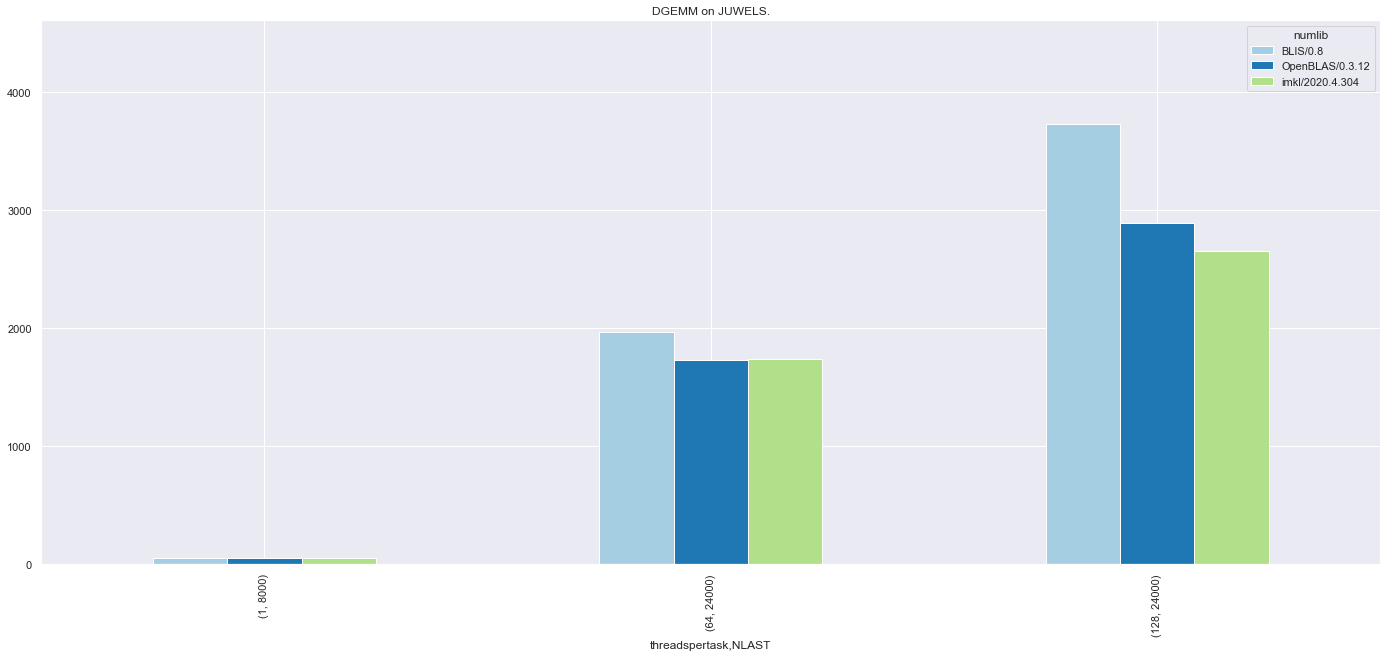

In [5]:
df.pivot_table(columns=["numlib"], index=["threadspertask","NLAST"], values="GFLOPS").plot(kind="bar", width=0.5, logy=False, title="DGEMM on JUWELS.",ylim=(0,theoreticalpeak));

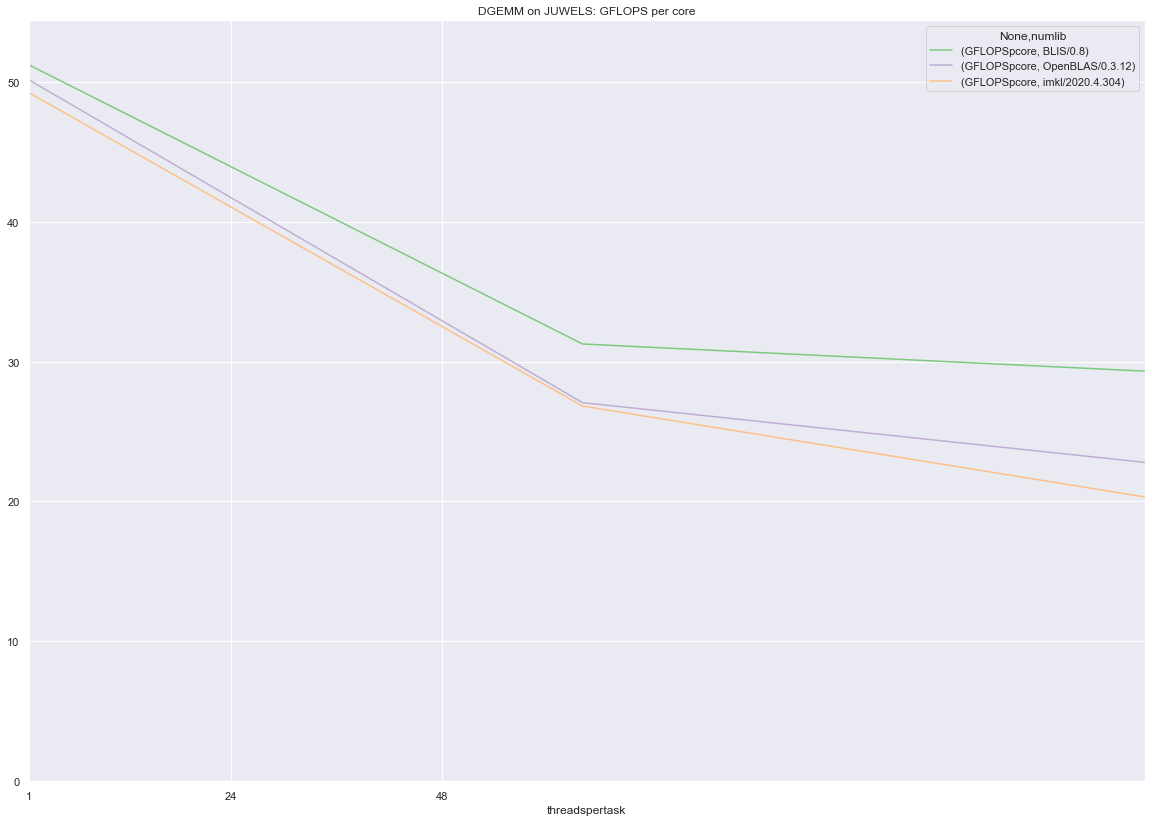

In [6]:
%matplotlib inline
sns.set(palette=sns.color_palette("Accent"))
plt.rcParams['figure.figsize'] = [20, 14]
table=df.pivot_table(columns=["numlib"],index=["threadspertask"], values=["GFLOPSpcore"])
plot=table.plot(kind="line", logy=False, title="DGEMM on JUWELS: GFLOPS per core");
plot.set_ylim(0,singlecorepeak)
plot.set_xticks([1,24,48])

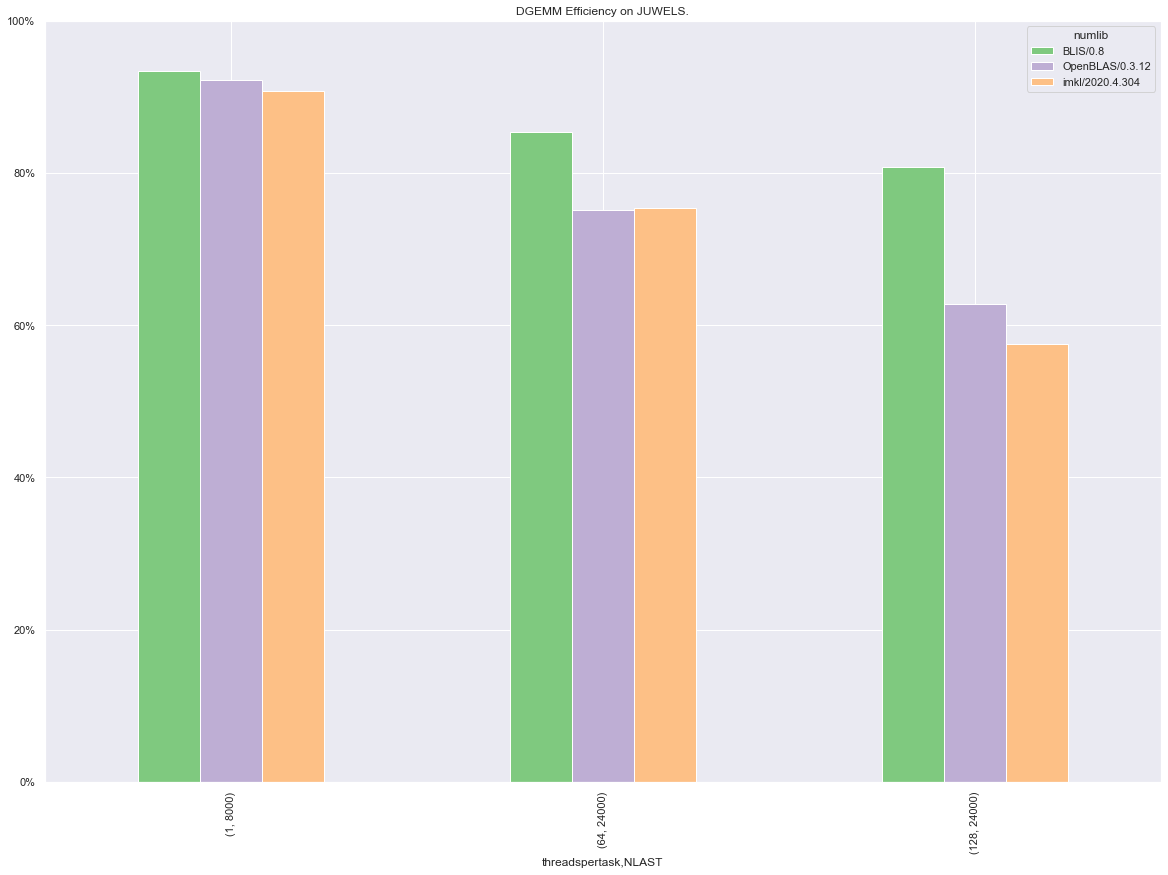

In [7]:
df['theoricalPeak'] = [theoricalPeak(int(x)) for x in df[['threadspertask']].values]
df['Efficiency'] = df.GFLOPS / df.theoricalPeak * 100

ax = df.pivot_table(columns=["numlib"], index=["threadspertask","NLAST"], values="Efficiency").plot(kind="bar", width=0.5, logy=False, title="DGEMM Efficiency on JUWELS.",ylim=(0,100));
ax.yaxis.set_major_formatter(mtick.PercentFormatter())